In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tick

In [2]:
cab_data = pd.read_csv('Cab_data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [3]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [6]:
transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


### Combining Transactions dataset and Customer creating master data frame

In [7]:
cab_data = cab_data.set_index('Transaction ID')
transaction_id = transaction_id.set_index('Transaction ID')

result = pd.concat([cab_data,transaction_id], axis = 1, join="inner")
result = result.reset_index()
result = result.set_index('Customer ID')

customer_id = customer_id.set_index('Customer ID')
df = pd.concat([result, customer_id], axis=1, join='inner')

cab_data = cab_data.reset_index()
transaction_id = transaction_id.reset_index()
customer_id = customer_id.reset_index()
df = df.reset_index()

df

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,29290,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,27703,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
2,28712,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242
3,28020,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327
4,27182,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651
359388,53286,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528
359389,52265,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966
359390,52175,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423


#### Converting Date of travel to date time and only selecting records from 31/01/2016 to 31/12/2018

In [8]:
df['Date of Travel'] = df['Date of Travel'].apply(lambda x: datetime.date(1900, 1, 1) + 
                                                  datetime.timedelta(days = int(x)))
df = df[(df['Date of Travel'] >= datetime.date(2016,1,31)) & 
   (df['Date of Travel'] <= datetime.date(2018,12,31))].reset_index(drop=True)

In [9]:
df

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,29170,10004263,2016-02-04,Pink Cab,ATLANTA GA,25.07,355.29,285.7980,Cash,Male,40,11777
1,34660,10004264,2016-01-31,Pink Cab,AUSTIN TX,30.38,210.18,331.1420,Card,Male,41,3886
2,58604,10004269,2016-02-01,Pink Cab,BOSTON MA,10.45,104.20,108.6800,Cash,Male,36,9088
3,58907,10004270,2016-01-31,Pink Cab,BOSTON MA,18.18,188.53,207.2520,Card,Male,58,2857
4,59321,10004271,2016-02-03,Pink Cab,BOSTON MA,38.61,358.05,405.4050,Cash,Male,45,22849
...,...,...,...,...,...,...,...,...,...,...,...,...
354953,52392,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651
354954,53286,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528
354955,52265,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966
354956,52175,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423


#### Creating a dataframe of cities with number of transactions per city

In [10]:
df_city_count = df[['City','Transaction ID']].groupby(by=['City']).agg(['count']).reset_index()
df_city_count.columns = ['City','No of Transactions']

df_city_count = df_city_count.set_index('City')
city = city.set_index('City')

df_cities = pd.concat([city, df_city_count], axis=1, join='inner')

df_city_count = df_city_count.reset_index()
city = city.reset_index()
df_cities = df_cities.reset_index()

df_cities['Population'] = df_cities['Population'].apply(lambda x: int(x.replace(',','')))
df_cities['Users'] = df_cities['Users'].apply(lambda x: int(x.replace(',','')))

df_top_5_cities = df_cities.sort_values('No of Transactions',ascending=False)[:5].reset_index(drop=True)

In [11]:
df_cities

,City,Population,Users,No of Transactions
0,NEW YORK NY,8405837,302149,98886
1,CHICAGO IL,1955130,164468,55777
2,LOS ANGELES CA,1595037,144132,47436
3,MIAMI FL,1339155,17675,6409
4,SILICON VALLEY,1177609,27247,8423
5,ORANGE COUNTY,1030185,12994,3945
6,SAN DIEGO CA,959307,69995,20237
7,PHOENIX AZ,943999,6133,2039
8,DALLAS TX,942908,22157,6904
9,ATLANTA GA,814885,24701,7454


#### Users in every city

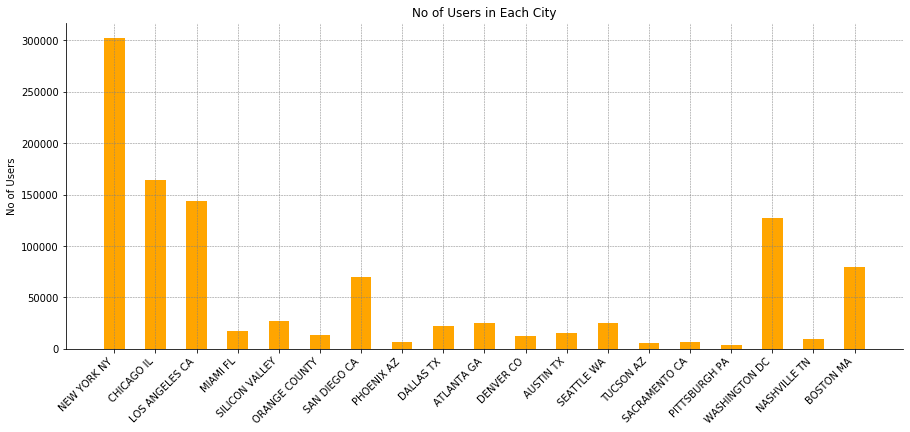

In [12]:
fig,ax = plt.subplots()

rects = ax.bar(df_cities['City'], df_cities['Users'], color='orange', width=0.5)
fig.set_figheight(6)
fig.set_figwidth(15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('No of Users')
ax.set_title('No of Users in Each City')
ax.set_xticklabels(df_cities['City'], rotation = 45, ha="right")
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

#### Comparision of Users and Transactions in each city

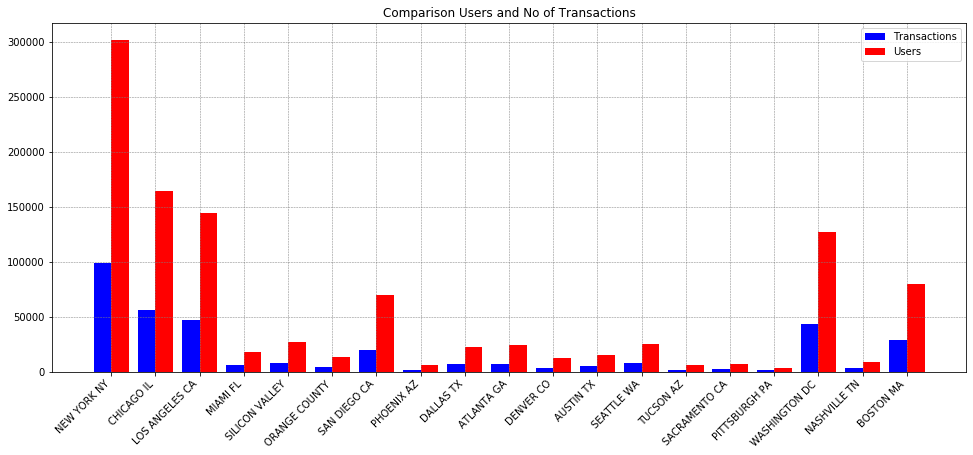

In [13]:
fig, ax = plt.subplots()
x = np.arange(len(df_cities['City']))
width=0.4

rects1 = ax.bar(x-(width/2), df_cities['No of Transactions'], color='b', width = width, label = 'Transactions')
rects2 = ax.bar(x+(width/2), df_cities['Users'], color='r', width = width, label = 'Users')

ax.set_xticks(x)
ax.set_xticklabels(df_cities['City'], rotation=45, ha='right')
ax.set_title('Comparison Users and No of Transactions')
ax.legend()
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

## Hypothesis 1: Which has more transactions and more users

#### Pink and Yellow cab stats

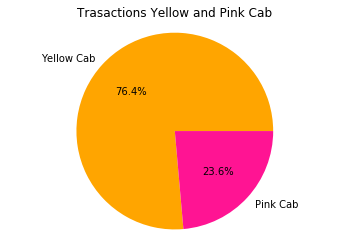

In [14]:
company_count = df[['Company','Transaction ID']].groupby(by=['Company']).agg(['count']).reset_index()
pink_cab_transactions = company_count.iloc[0][1] 
yellow_cab_transactions = company_count.iloc[1][1] 
fig1, ax1 = plt.subplots()
ax1.pie([yellow_cab_transactions, pink_cab_transactions], labels=['Yellow Cab', 'Pink Cab'], autopct='%1.1f%%', 
        colors=['#FFA500','#FF1493'])
ax1.axis('equal')
ax1.set_title('Trasactions Yellow and Pink Cab')
plt.show()

In [15]:
pink_cab = df[df['Company'] == 'Pink Cab'][['City', 'Customer ID']]
pink_cab = pink_cab.drop_duplicates('Customer ID')
pink_cab = pink_cab.groupby(by='City').agg(['count'])
pink_cab.columns = ['Pink Cab customers count']

yellow_cab = df[df['Company'] == 'Yellow Cab'][['City', 'Customer ID']]
yellow_cab = yellow_cab.drop_duplicates('Customer ID')
yellow_cab = yellow_cab.groupby(by='City').agg(['count'])
yellow_cab.columns = ['Yellow Cab customers count']

customers_city = pd.concat([pink_cab,yellow_cab], axis=1, join='inner')
customer_city = customers_city.reset_index()

#customer_city.sort_values('')
#customer_city

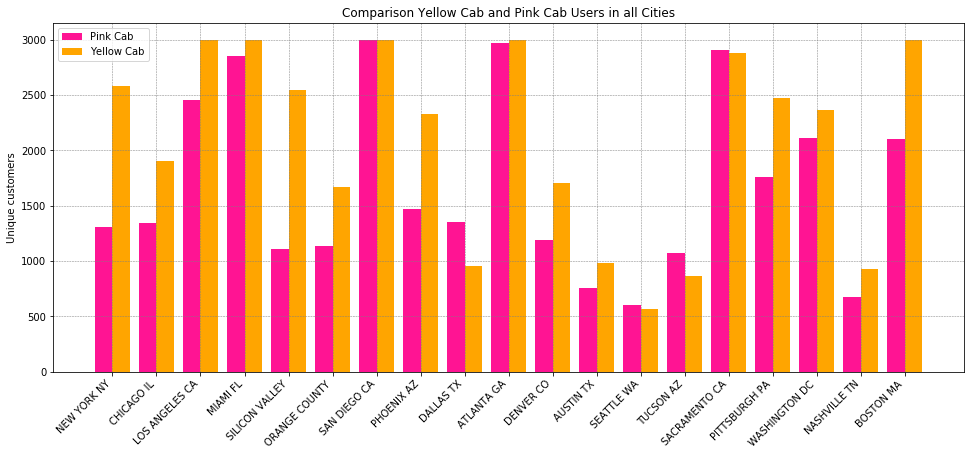

In [16]:
fig, ax = plt.subplots()
x = np.arange(len(customer_city['City']))
width=0.4

rects1 = ax.bar(x-(width/2), customer_city['Pink Cab customers count'], color='#FF1493', width = width, label = 'Pink Cab')
rects2 = ax.bar(x+(width/2), customer_city['Yellow Cab customers count'], color='#FFA500', width = width, label = 'Yellow Cab')

ax.set_xticks(x)
ax.set_xticklabels(df_cities['City'], rotation=45, ha='right')
ax.set_ylabel('Unique customers')
ax.set_title('Comparison Yellow Cab and Pink Cab Users in all Cities')
ax.legend()
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### Creating a Profit Column

In [17]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,29170,10004263,2016-02-04,Pink Cab,ATLANTA GA,25.07,355.29,285.7980,Cash,Male,40,11777,69.4920
1,34660,10004264,2016-01-31,Pink Cab,AUSTIN TX,30.38,210.18,331.1420,Card,Male,41,3886,-120.9620
2,58604,10004269,2016-02-01,Pink Cab,BOSTON MA,10.45,104.20,108.6800,Cash,Male,36,9088,-4.4800
3,58907,10004270,2016-01-31,Pink Cab,BOSTON MA,18.18,188.53,207.2520,Card,Male,58,2857,-18.7220
4,59321,10004271,2016-02-03,Pink Cab,BOSTON MA,38.61,358.05,405.4050,Cash,Male,45,22849,-47.3550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354953,52392,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651,5.8800
354954,53286,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528,6.9020
354955,52265,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966,87.4200
354956,52175,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423,32.1420


## Hypothesis 1: Which company has more of the transaction share

In [18]:
df_pink = df[df['Company'] == 'Pink Cab']
df_yellow = df[df['Company'] == 'Yellow Cab'] 

In [19]:
df_pink['Month'] = df_pink['Date of Travel'].apply(lambda x: x.month)
df_pink['Day'] = df_pink['Date of Travel'].apply(lambda x: x.day)
df_pink['Year'] = df_pink['Date of Travel'].apply(lambda x: x.year)

df_yellow['Month'] = df_yellow['Date of Travel'].apply(lambda x: x.month)
df_yellow['Day'] = df_yellow['Date of Travel'].apply(lambda x: x.day)
df_yellow['Year'] = df_yellow['Date of Travel'].apply(lambda x: x.year)



date_profit_pink = df_pink[['Profit', 'Month']].groupby(by=['Month']).agg('mean')
date_profit_yellow = df_yellow[['Profit', 'Month']].groupby(by=['Month']).agg('mean')
date_transactions_pink = df_pink[['Month', 'Transaction ID']].groupby(by=['Month']).agg('count')
date_transactions_yellow = df_yellow[['Month', 'Transaction ID']].groupby(by=['Month']).agg('count')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

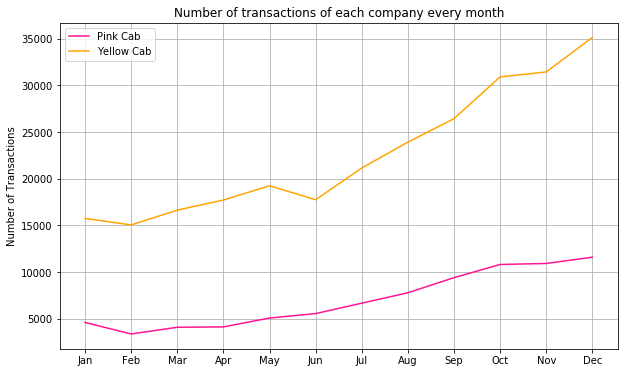

In [20]:
fig, ax = plt.subplots()
rects1 = ax.plot(date_transactions_pink.index, date_transactions_pink['Transaction ID'], color='#FF1493', label = 'Pink Cab')
rects2 = ax.plot(date_transactions_yellow.index, date_transactions_yellow['Transaction ID'], color='#FFA500', label = 'Yellow Cab')

ax.set_xticks(date_transactions_pink.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of transactions of each company every month')
ax.grid()
ax.legend()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()

#### Average profit per transaction of Yellow Cab is double of Pink Cab, considering there are more yellow cab transactions

## Hypothesis 3: Which company has more profit margin

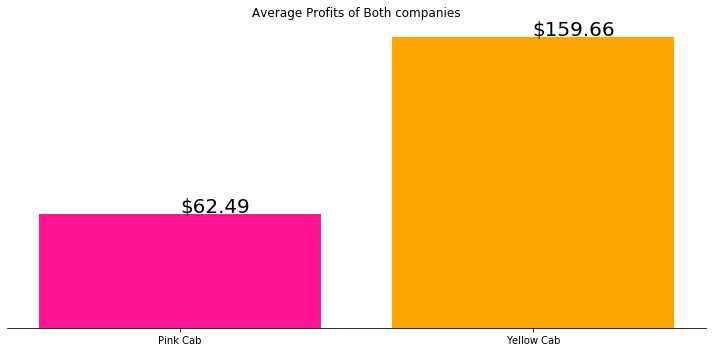

In [21]:
fig, ax = plt.subplots()

rects1 = ax.bar('Pink Cab', df_pink['Profit'].mean(), color='#FF1493', label = 'Average profit Pink Cabs')
rects2 = ax.bar('Yellow Cab',df_yellow['Profit'].mean(), color='#FFA500', label = 'Average profit Yellow Cabs')

ax.set_title('Average Profits of Both companies')
ax.set_xticklabels(['Pink Cab', 'Yellow Cab'])
ax.set_yticklabels([])
ax.set_yticks([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

for index,data in enumerate([df_pink['Profit'].mean(), df_yellow['Profit'].mean()]):
    plt.text(x=index , y =data+1 , s="${:.2f}".format(data) , fontdict=dict(fontsize=20))

fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout()

plt.show()

#### Average profit of both the companies throught the year

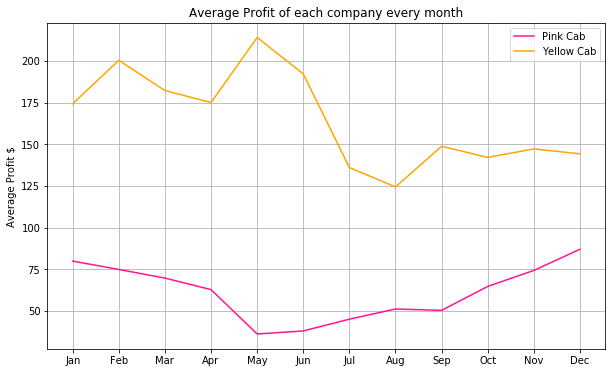

In [22]:
fig, ax = plt.subplots()
rects = ax.plot(date_profit_pink.index, date_profit_pink['Profit'], color='#FF1493', label = 'Pink Cab')
rects = ax.plot(date_profit_yellow.index, date_profit_yellow['Profit'], color='#FFA500', label = 'Yellow Cab')

ax.set_xticks(date_profit_pink.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Average Profit $')
ax.set_title('Average Profit of each company every month')
ax.legend()
ax.grid()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()

## Hypothesis 4: What are the revenues generated by each company 

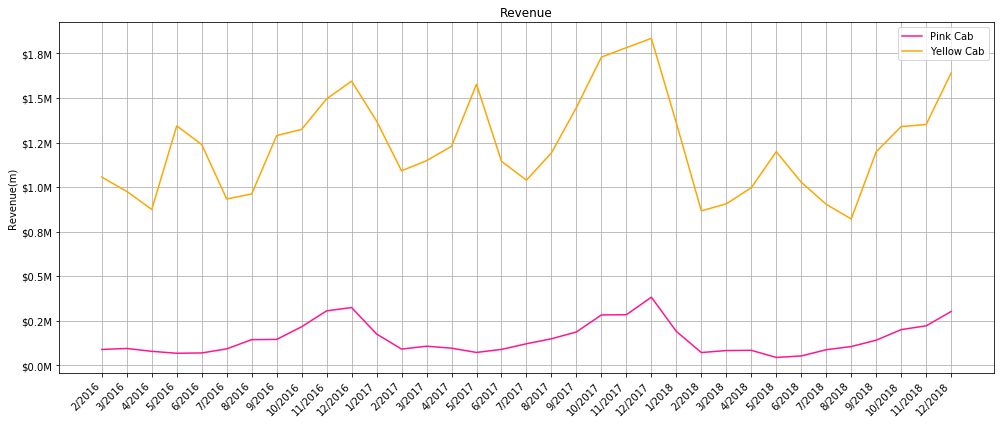

In [23]:
pink_revenue = df_pink[['Profit','Month','Year']].groupby(['Year','Month']).agg({'Profit':'sum'}).reset_index()
pink_revenue['Period'] = pink_revenue['Month'].astype(str)+'/'+pink_revenue['Year'].astype(str)

yellow_revenue = df_yellow[['Profit','Month','Year']].groupby(['Year','Month']).agg({'Profit':'sum'}).reset_index()
yellow_revenue['Period'] = yellow_revenue['Month'].astype(str)+'/'+yellow_revenue['Year'].astype(str)

fig,ax = plt.subplots()

rects1 = ax.plot(pink_revenue['Period'][1:], pink_revenue['Profit'][1:], label='Pink Cab', color='#FF1493')
rects2 = ax.plot(yellow_revenue['Period'][1:], yellow_revenue['Profit'][1:], label='Yellow Cab', color='#FFA500')


ax.set_title('Revenue')
ax.set_xticks(pink_revenue['Period'][1:])
ax.set_xticklabels(pink_revenue['Period'][1:], rotation=45, ha='right')
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax.set_ylabel('Revenue(m)')
ax.grid()
ax.legend()

fig.set_figwidth(14)
fig.set_figheight(6)
fig.tight_layout()

plt.show()

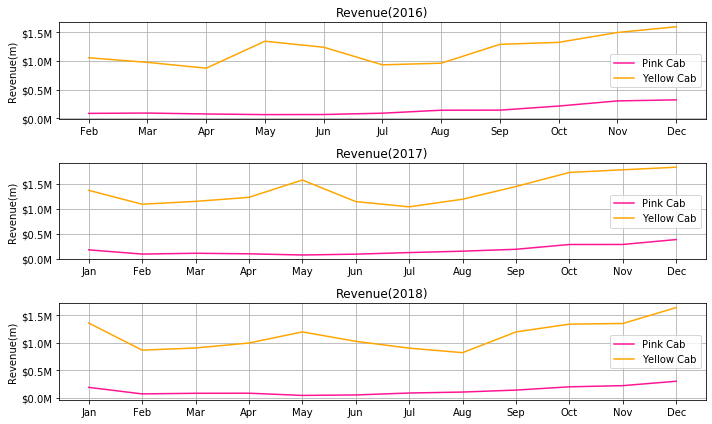

In [24]:
pink_revenue = df_pink[['Profit','Month','Year']].groupby(['Year','Month']).agg({'Profit':'sum'}).reset_index()
pink_revenue['Period'] = pink_revenue['Month'].astype(str)+'/'+pink_revenue['Year'].astype(str)

yellow_revenue = df_yellow[['Profit','Month','Year']].groupby(['Year','Month']).agg({'Profit':'sum'}).reset_index()
yellow_revenue['Period'] = yellow_revenue['Month'].astype(str)+'/'+yellow_revenue['Year'].astype(str)

fig,ax = plt.subplots(3)

rects1 = ax[0].plot(pink_revenue['Period'][pink_revenue['Year'] == 2016][1:], 
                    pink_revenue['Profit'][pink_revenue['Year'] == 2016][1:], label='Pink Cab', color='#FF1493')
rects2 = ax[0].plot(yellow_revenue['Period'][yellow_revenue['Year'] == 2016][1:]
                                , yellow_revenue['Profit'][yellow_revenue['Year'] == 2016][1:]
                    , label='Yellow Cab', color='#FFA500')

rects3 = ax[1].plot(pink_revenue['Period'][pink_revenue['Year'] == 2017], 
                    pink_revenue['Profit'][pink_revenue['Year'] == 2017], label='Pink Cab', color='#FF1493')
rects4 = ax[1].plot(yellow_revenue['Period'][yellow_revenue['Year'] == 2017]
                                , yellow_revenue['Profit'][yellow_revenue['Year'] == 2017]
                    , label='Yellow Cab', color='#FFA500')

rects5 = ax[2].plot(pink_revenue['Period'][pink_revenue['Year'] == 2018], 
                    pink_revenue['Profit'][pink_revenue['Year'] == 2018], label='Pink Cab', color='#FF1493')
rects6 = ax[2].plot(yellow_revenue['Period'][yellow_revenue['Year'] == 2018]
                                , yellow_revenue['Profit'][yellow_revenue['Year'] == 2018]
                    , label='Yellow Cab', color='#FFA500')


ax[0].set_title('Revenue(2016)')
ax[0].set_xticks(pink_revenue['Period'][pink_revenue['Year'] == 2016][1:])
ax[0].set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax[0].set_ylabel('Revenue(m)')
ax[0].grid()
ax[0].legend()

ax[1].set_title('Revenue(2017)')
ax[1].set_xticks(pink_revenue['Period'][pink_revenue['Year'] == 2017])
ax[1].set_xticklabels(['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax[1].set_ylabel('Revenue(m)')
ax[1].grid()
ax[1].legend()

ax[2].set_title('Revenue(2018)')
ax[2].set_xticks(pink_revenue['Period'][pink_revenue['Year'] == 2018])
ax[2].set_xticklabels(['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[2].yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax[2].set_ylabel('Revenue(m)')
ax[2].grid()
ax[2].legend()

fig.set_figwidth(10)
fig.set_figheight(6)
fig.tight_layout()

plt.show()

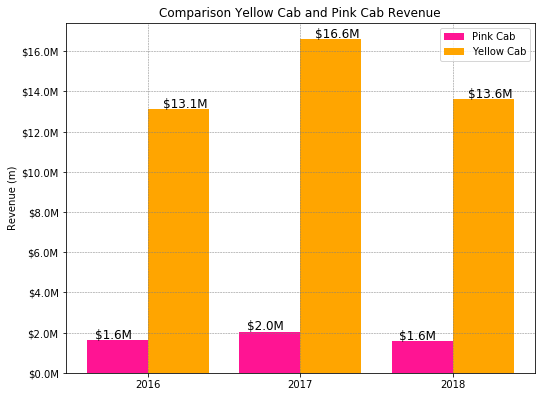

In [35]:
pink_revenue = df_pink[['Profit','Month','Year']].groupby(['Year']).agg({'Profit':'sum'}).reset_index()

yellow_revenue = df_yellow[['Profit','Month','Year']].groupby(['Year']).agg({'Profit':'sum'}).reset_index()

fig, ax = plt.subplots()
x = np.arange(len(pink_revenue['Year']))
width=0.4

rects1 = ax.bar(x-(width/2), pink_revenue['Profit'], color='#FF1493', width = width, label = 'Pink Cab')
rects2 = ax.bar(x+(width/2), yellow_revenue['Profit'], color='#FFA500', width = width, label = 'Yellow Cab')

ax.set_xticks(x)
ax.set_xticklabels(yellow_revenue['Year'])
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax.set_ylabel('Revenue (m)')
ax.set_title('Comparison Yellow Cab and Pink Cab Revenue')
ax.legend()
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


for index,data in enumerate(pink_revenue['Profit'].tolist()):
    ax.text(x=(index-0.35) , y =data+100000  , s="${:1.1f}M".format(data*1e-6) , fontdict=dict(fontsize=12))

for index,data in enumerate(yellow_revenue['Profit'].tolist()):
    ax.text(x=(index+0.10) , y =data+100000 , s="${:1.1f}M".format(data*1e-6) , fontdict=dict(fontsize=12))


fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(8)
plt.show()

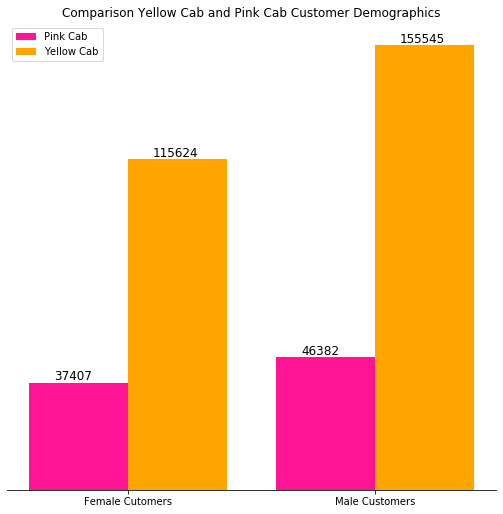

In [98]:
demo_pink = df_pink[['Gender','Customer ID','Profit']].groupby(by = 'Gender').agg({'Customer ID':'count','Profit':'sum'}).reset_index()
demo_yellow = df_yellow[['Gender','Customer ID','Profit']].groupby(by = 'Gender').agg({'Customer ID':'count','Profit':'sum'}).reset_index()

fig, ax = plt.subplots()

x = np.arange(len(demo_yellow['Gender']))
width=0.4

rects1 = ax.bar(x-(width/2), demo_pink['Customer ID'], width = width, label = 'Pink Cab', color = '#FF1493')
rects2 = ax.bar(x+(width/2), demo_yellow['Customer ID'], width = width,label = 'Yellow Cab', color = '#FFA500')

ax.set_xticks(x)
ax.set_xticklabels(['Female Cutomers', 'Male Customers'])
ax.set_yticklabels([])
ax.set_yticks([])
#ax.set_ylabel('Number of Customers')
ax.set_title('Comparison Yellow Cab and Pink Cab Customer Demographics')
ax.legend()


for index,data in enumerate(demo_pink['Customer ID'].tolist()):
    ax.text(x=(index-0.3) , y =data+1000 , s= data , fontdict=dict(fontsize=12))

for index,data in enumerate(demo_yellow['Customer ID'].tolist()):
    ax.text(x=(index+0.10) , y =data+1000 , s=data , fontdict=dict(fontsize=12))
    

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

plt.show()

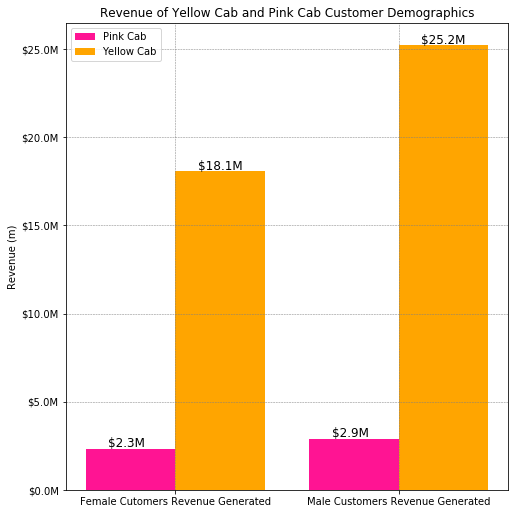

In [101]:
demo_pink = df_pink[['Gender','Customer ID','Profit']].groupby(by = 'Gender').agg({'Customer ID':'count','Profit':'sum'}).reset_index()
demo_yellow = df_yellow[['Gender','Customer ID','Profit']].groupby(by = 'Gender').agg({'Customer ID':'count','Profit':'sum'}).reset_index()

fig, ax = plt.subplots()

x = np.arange(len(demo_yellow['Gender']))
width=0.4

rects1 = ax.bar(x-(width/2), demo_pink['Profit'], width = width, label = 'Pink Cab', color = '#FF1493')
rects2 = ax.bar(x+(width/2), demo_yellow['Profit'], width = width,label = 'Yellow Cab', color = '#FFA500')

ax.set_xticks(x)
ax.set_xticklabels(['Female Cutomers Revenue Generated', 'Male Customers Revenue Generated'])
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax.set_ylabel('Revenue (m)')
ax.set_title('Revenue of Yellow Cab and Pink Cab Customer Demographics')
ax.legend()
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


for index,data in enumerate(demo_pink['Profit'].tolist()):
    ax.text(x=(index-0.3) , y =data+100000 , s= "${:1.1f}M".format(data*1e-6) , fontdict=dict(fontsize=12))

for index,data in enumerate(demo_yellow['Profit'].tolist()):
    ax.text(x=(index+0.10) , y =data+100000 , s="${:1.1f}M".format(data*1e-6) , fontdict=dict(fontsize=12))
    


fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

plt.show()

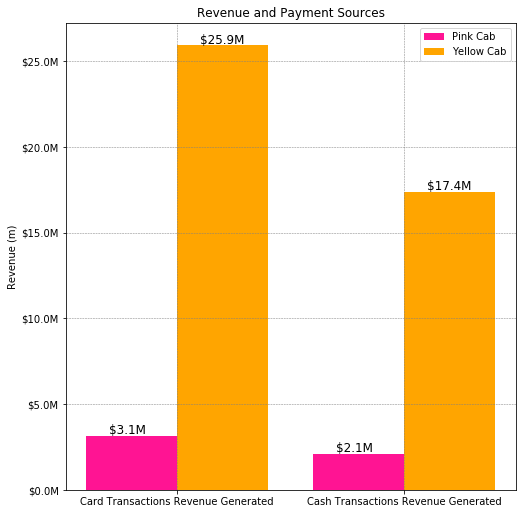

In [107]:
demo_pink = df_pink[['Payment_Mode','Customer ID','Profit']].groupby(by = 'Payment_Mode').agg({'Customer ID':'count','Profit':'sum'}).reset_index()
demo_yellow = df_yellow[['Payment_Mode','Customer ID','Profit']].groupby(by = 'Payment_Mode').agg({'Customer ID':'count','Profit':'sum'}).reset_index()

fig, ax = plt.subplots()

x = np.arange(len(demo_yellow['Payment_Mode']))
width=0.4

rects1 = ax.bar(x-(width/2), demo_pink['Profit'], width = width, label = 'Pink Cab', color = '#FF1493')
rects2 = ax.bar(x+(width/2), demo_yellow['Profit'], width = width,label = 'Yellow Cab', color = '#FFA500')

ax.set_xticks(x)
ax.set_xticklabels(['Card Transactions Revenue Generated', 'Cash Transactions Revenue Generated'])
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,pos: '${:1.1f}M'.format(x*1e-6)))
ax.set_ylabel('Revenue (m)')
ax.set_title('Revenue and Payment Sources')
ax.legend()
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


for index,data in enumerate(demo_pink['Profit'].tolist()):
    ax.text(x=(index-0.3) , y =data+100000 , s= "${:1.1f}M".format(data*1e-6) , fontdict=dict(fontsize=12))

for index,data in enumerate(demo_yellow['Profit'].tolist()):
    ax.text(x=(index+0.10) , y =data+100000 , s="${:1.1f}M".format(data*1e-6) , fontdict=dict(fontsize=12))
    


fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

plt.show()

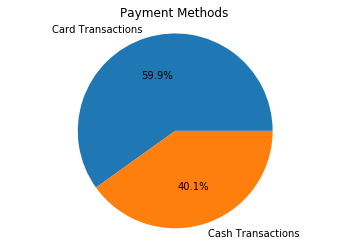

In [122]:
card_transactions = sum(df[df['Payment_Mode'] == 'Card']['Profit'])
cash_transactions = sum(df[df['Payment_Mode'] == 'Cash']['Profit']) 
fig1, ax1 = plt.subplots()
ax1.pie([card_transactions, cash_transactions], labels=['Card Transactions', 'Cash Transactions'], autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Payment Methods')
plt.show()

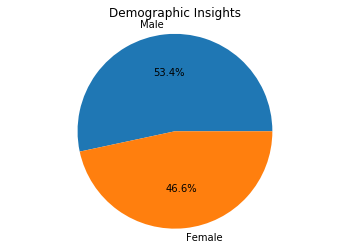

In [121]:
male_customers = len(df[df['Gender'] == 'Male']['Customer ID'].unique())
female_customers = len(df[df['Gender'] == 'Female']['Customer ID'].unique()) 
fig1, ax1 = plt.subplots()
ax1.pie([male_customers, female_customers], labels=['Male', 'Female'], autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Demographic Insights')
plt.show()

In [117]:
len(df[df['Gender'] == 'Male']['Customer ID'].unique())

24549